## Seaborn

#### Matplotlib보다 쉽고, 예쁘게, Pandas와의 쉬운 연동


* Matplotlib 기반으로 쉽게 작성됨. Matplotlib의 high level API라고 이해하면 편함
* Default 설정만으로 Matplotlib보다 수려한 Visual을 제공하며 Pandas와 쉽게 연동이 됨
* 그러나 Matplotlib를 어느정도 알고 있어야 함

### Seaborn의 Axes level vs Figure level 함수

* Axes Level은 기존 Matplotlib과 유사하게 개별 Axes가 plot에 대한 주도적인 역할을 수행
* Figure Level은 Seaborn의 FacetGrid라는 클래스에서 개별 Axes기반의 plot을 그릴 수 있는 기능을 통제함
    * hue(option)

In [1]:
from IPython.display import Image

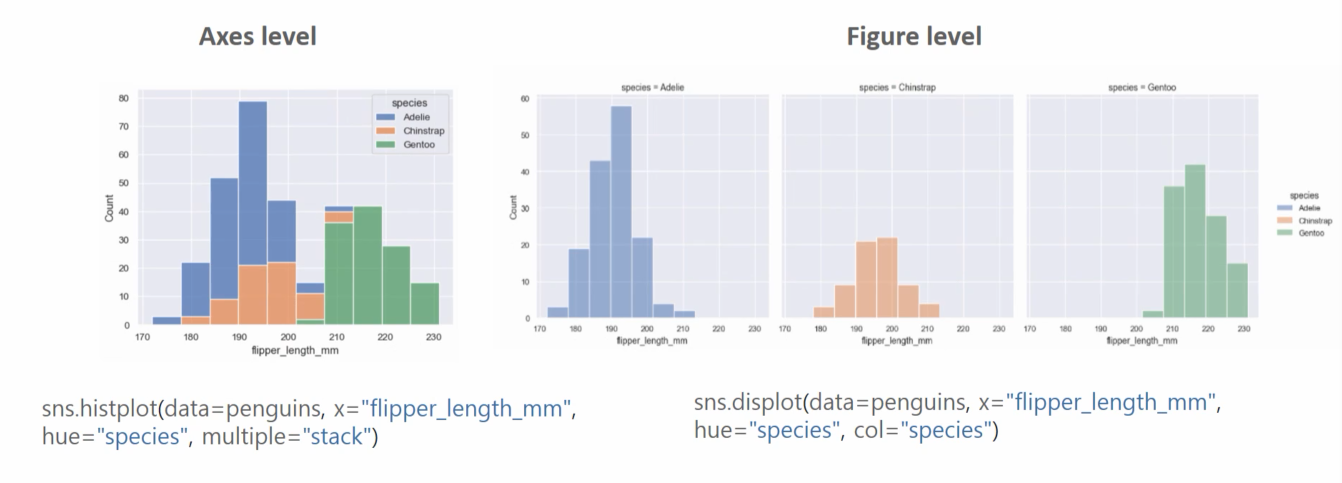

In [2]:
Image("img/seaborn-axeslevel&figurelevel.png")

* relplot(relational)
    * scatterplot
    * lineplot
* displot(distributions)
    * histplot
    * kdeplot
    * ecdfplot
    * rugplot
* catplot(categorical)
    * stripplot
    * swarmplot
    * boxplot
    * violinplot
    * pointplot
    * barplot

* 장점
    * 여러 개의 subplot에서의 plot을 매우 쉽게 생성할 수 있음
    * 여러 개의 subplot에서의 축의 명칭, 타이틀들을 별도로 지정하지 않고 자동으로 인지하여 생성
    * 개별 plot들을 복합하여 쉽게 시각화할 수 있는 기능 제공
* 단점
    * 새로운 API에 적응해야함. 신규 인자들, 적용 메커니즘에 대한 적응 필요
    * 커스터마이징 변경 적용이 어려움

---

### Seaborn - 히스토그램 시각화 실습

#### 타이타닉 데이터세트 로딩하기

In [3]:
import pandas as pd

titanic_df = pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Histogram

* 연속값에 대한 구간별 도수 분포를 시각화

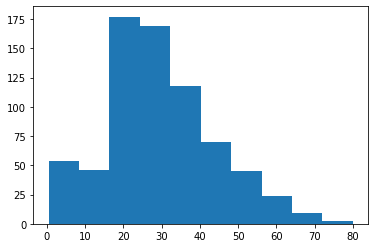

In [4]:
### matplotlib histogram
import matplotlib.pyplot as plt

plt.hist(titanic_df['Age'])
plt.show()

<AxesSubplot:>

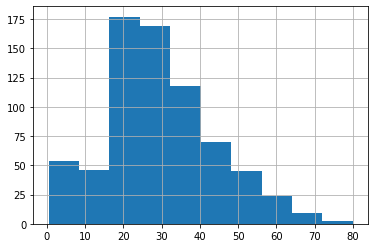

In [5]:
# Pandas 에서 hist 함수를 바로 호출할 수 있음. 
titanic_df['Age'].hist()

### seaborn histogram


* seaborn의 예전 histogram은 distplot함수지만 deprecate됨.
* seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임.

C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

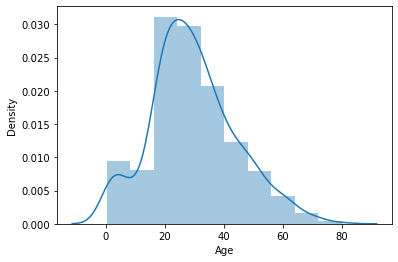

In [6]:
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

sns.distplot(titanic_df['Age'], bins=10)

In [7]:
# distplot은 x, data와 같이 컬럼명을 x인자로 설정할 수 없음. 
sns.distplot(x='Age', data=titanic_df)

TypeError: distplot() got an unexpected keyword argument 'data'

<AxesSubplot:xlabel='Age', ylabel='Count'>

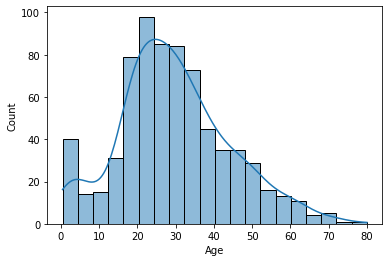

In [8]:
### seaborn histogram
import seaborn as sns

# seaborn에서도 figure로 canvas의 사이즈를 조정
#plt.figure(figsize=(10, 6))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.histplot(titanic_df['Age'], kde=True)
#plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

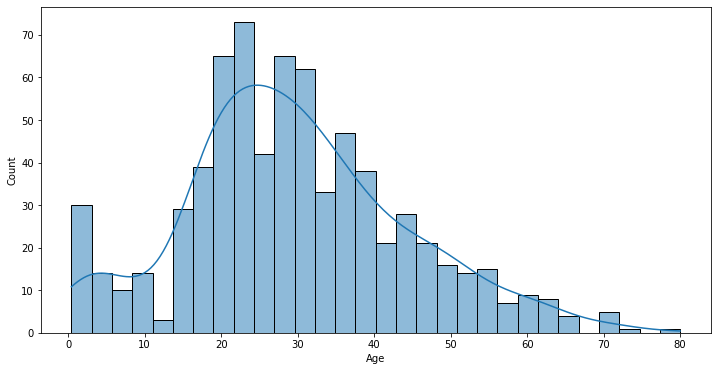

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=titanic_df, kde=True, bins=30)

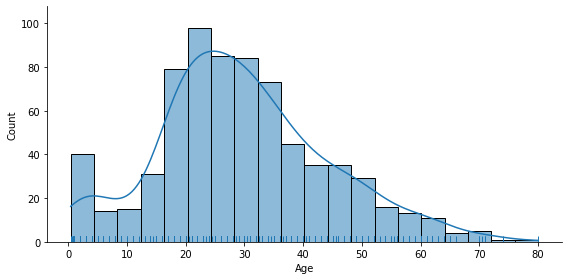

In [10]:
import seaborn as sns

# seaborn의 "figure레벨 그래프"는 plt.figure로 figure 크기를 조절할 수 없습니다. 
# plt.figure(figsize=(4, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.displot(titanic_df['Age'], kde=True, rug=True, height=4, aspect=2)
plt.show()

C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aaaaaa\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

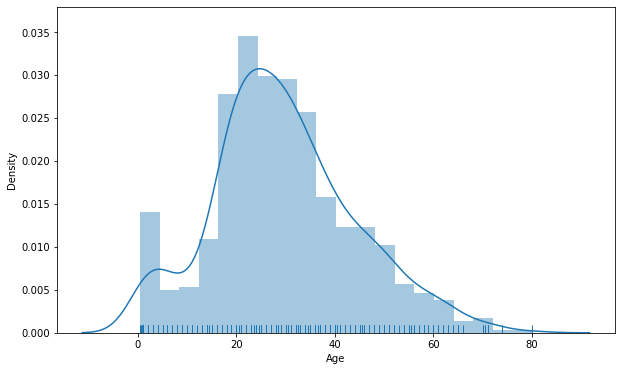

In [11]:
plt.figure(figsize=(10, 6))
sns.distplot(titanic_df['Age'], kde=True, rug=True)

---

### seaborn - countplot


* countplot은 카테고리 값에 대한 건수를 표현. x축이 카테고리값, y축이 해당 카테고리값에 대한 건수

<AxesSubplot:xlabel='Pclass', ylabel='count'>

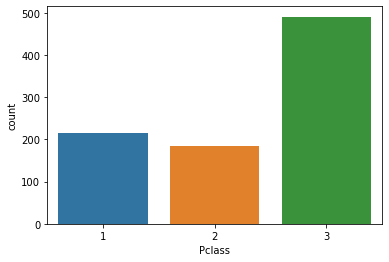

In [12]:
sns.countplot(x='Pclass', data=titanic_df)

---

### seaborn - barplot

* seaborn의 barplot은 x축은 이산값(주로 category값), y축은 연속값(y값의 평균/총합)을 표현

In [13]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

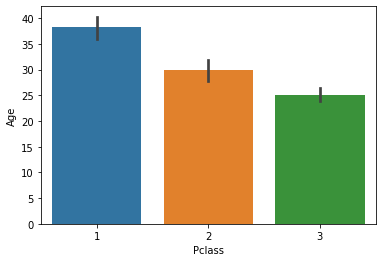

In [14]:
#plt.figure(figsize=(10, 6))
# 자동으로 xlabel, ylabel을 x입력값, y입력값으로 설정. 
sns.barplot(x='Pclass', y='Age', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

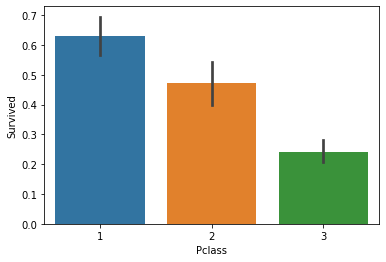

In [15]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

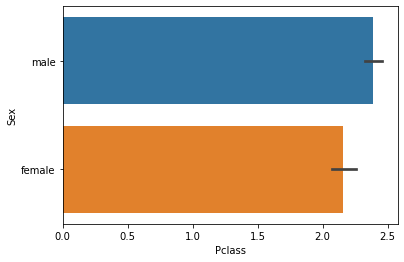

In [16]:
### 수직 barplot에 y축을 문자값으로 설정하면 자동으로 수평 barplot으로 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

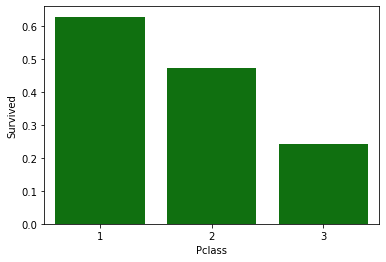

In [17]:
# confidence interval을 없애고, color를 통일.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

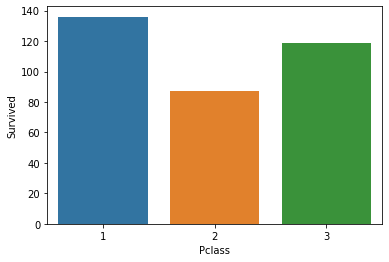

In [18]:
# 평균이 아니라 총합으로 표현. estimator=sum
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)

#### bar plot에서 hue를 이용하여 X값을 특정 컬럼별로 세분화하여 시각화

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

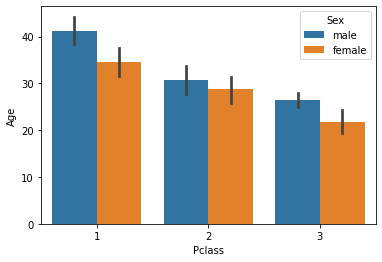

In [19]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Age 평균 값을 구함. 
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
# select .. from titanic group by pclass

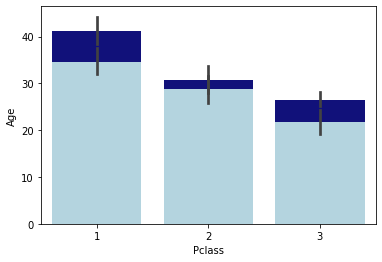

In [20]:
# 아래는 stacked bar를 흉내 냈으나 stacked bar라고 할 수 없음. 
bar1 = sns.barplot(x="Pclass",  y="Age", data=titanic_df[titanic_df['Sex']=='male'], color='darkblue')
bar2 = sns.barplot(x="Pclass",  y="Age", data=titanic_df[titanic_df['Sex']=='female'], color='lightblue')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

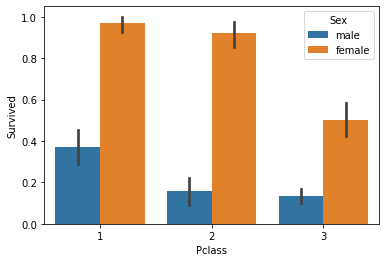

In [21]:
# Pclass가 X축값이며 Survived가 Y축값. hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Survived 평균 값을 구함. 
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [22]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성. 
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 ‘Age’ 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [23]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

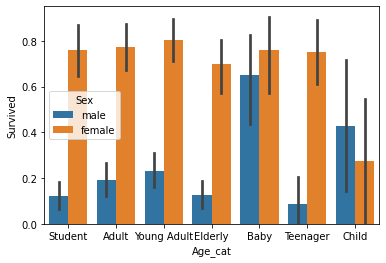

In [24]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

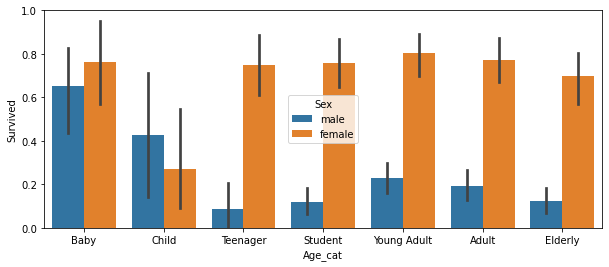

In [25]:
plt.figure(figsize=(10, 4))
order_columns = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=order_columns)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

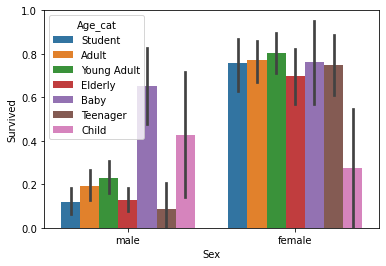

In [26]:
sns.barplot(x='Sex', y='Survived', hue='Age_cat', data=titanic_df)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

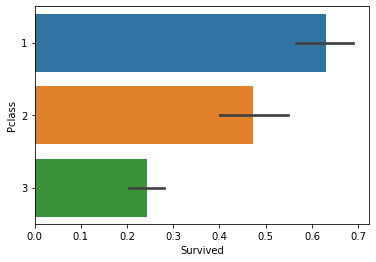

In [27]:
# orient를 h를 하면 수평 바 플롯을 그림. 단 이번엔 y축값이 이산형 값
sns.barplot(x='Survived', y='Pclass', data=titanic_df, orient='h')

---

### seaborn - violin plot


* 단일 컬럼에 대해서는 히스토그램과 유사하게 연속값의 분포도를 시각화. 또한 중심에는 4분위를 알수있음.
* 보통은 X축에 설정한 컬럼의 개별 이산값 별로 Y축 컬럼값의 분포도를 시각화하는 용도로 많이 사용

<AxesSubplot:ylabel='Age'>

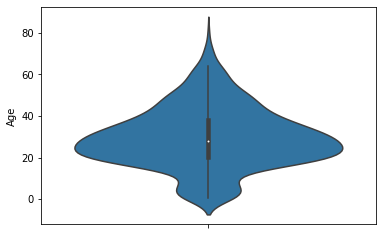

In [28]:
# Age 컬럼에 대한 연속 확률 분포 시각화 
sns.violinplot(y='Age', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

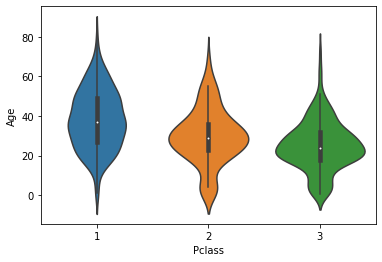

In [29]:
# x축값인 Pclass의 값별로 y축 값인 Age의 연속분포 곡선을 알 수 있음. 
sns.violinplot(x='Pclass', y='Age', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

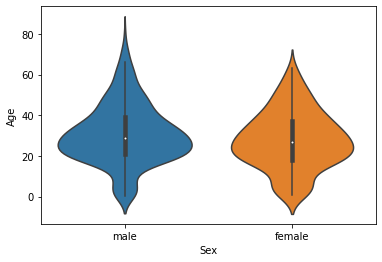

In [30]:
# x축인 Sex값 별로 y축값이 Age의 값 분포를 알 수 있음. 
sns.violinplot(x='Sex', y='Age', data=titanic_df)

---

### seaborn에서 subplots 이용하기

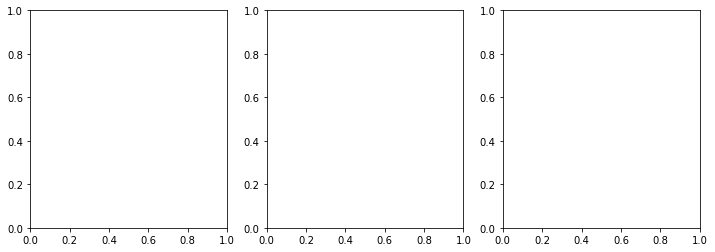

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#### subplots을 이용하여 주요 category성 컬럼의 건수를 시각화 하기

index: 0
index: 1
index: 2
index: 3


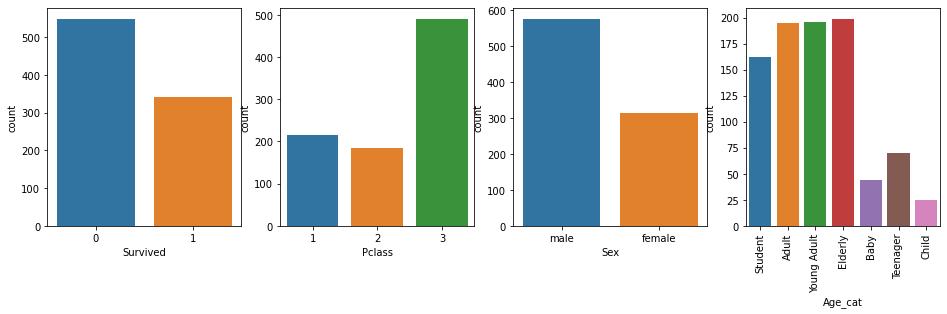

In [32]:
cat_columns = ['Survived', 'Pclass', 'Sex', 'Age_cat']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정. 
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(16, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정. 
    sns.countplot(x=column, data=titanic_df, ax=axs[index])
    if index == 3:
        # plt.xticks(rotation=90)으로 간단하게 할수 있지만 Axes 객체를 직접 이용할 경우 API가 상대적으로 복잡. 
        axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=90)

#### subplots을 이용하여 주요 category성 컬럼별로 컬럼값에 따른 생존율 시각화 하기

index: 0
index: 1
index: 2


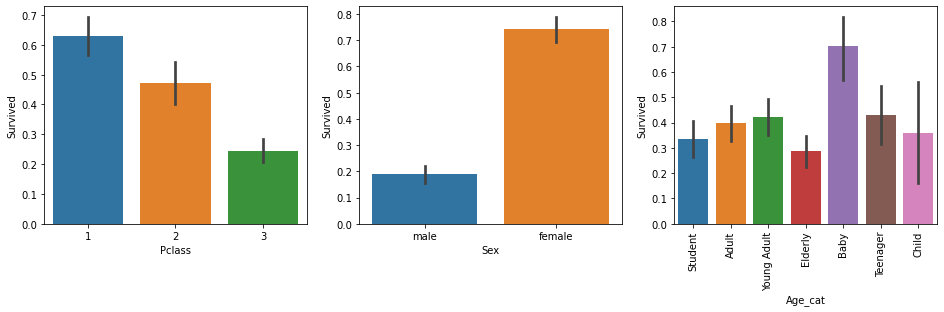

In [33]:
cat_columns = ['Pclass', 'Sex', 'Age_cat']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정. 
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(16, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정. 
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])
    if index == 2:
        # plt.xticks(rotation=90)으로 간단하게 할수 있지만 Axes 객체를 직접 이용할 경우 API가 상대적으로 복잡. 
        axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=90)

#### subplots를 이용하여 여러 연속형 컬럼값들의 Survived 값에 따른 연속 분포도를 시각화

* 왼쪽에는 Violin Plot으로
* 오른쪽에는 Survived가 0일때의 Histogram과 Survived가 1일때의 Histogram을 함께 표현

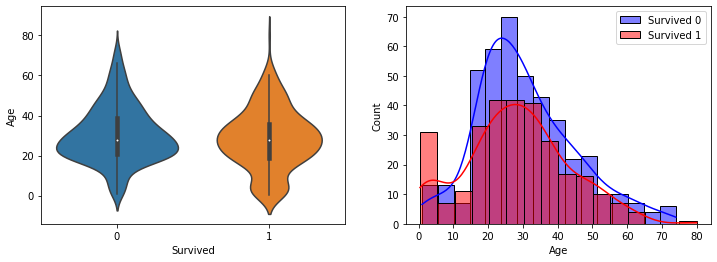

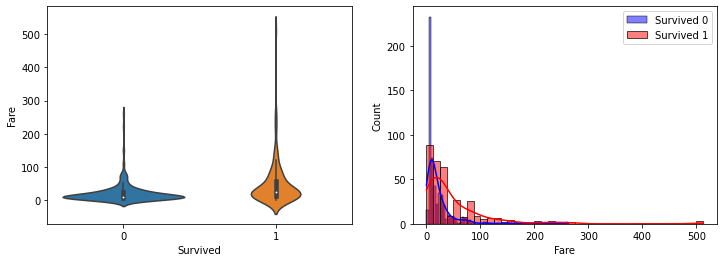

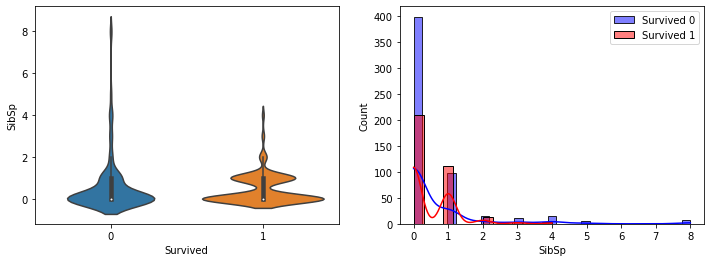

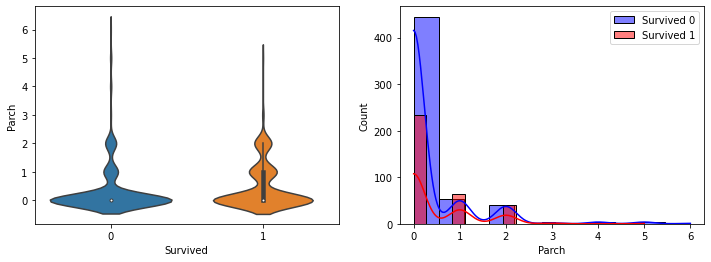

In [34]:
def show_hist_by_target(df, columns):
    cond_1 = (df['Survived'] == 1)
    cond_0 = (df['Survived'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        sns.violinplot(x='Survived', y=column, data=df, ax=axs[0] )
        sns.histplot(df[cond_0][column], ax=axs[1], kde=True, label='Survived 0', color='blue')
        sns.histplot(df[cond_1][column], ax=axs[1], kde=True, label='Survived 1', color='red')
        axs[1].legend()
        
cont_columns = ['Age', 'Fare', 'SibSp', 'Parch']
show_hist_by_target(titanic_df, cont_columns)